In [1]:
#from sunpy.net import hek
#from sunpy.net import hek2vso
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib qt
import shapely
from shapely.wkt import dumps, loads
import numpy as np
import pandas as pd
from shapely.geometry.polygon import LinearRing, Polygon
from datetime import timedelta
import datetime
#from sunpy.time import *
from dateutil.parser import parse
import matplotlib.cm as cm
import matplotlib as mpl
from operator import itemgetter
from itertools import groupby
import itertools
import operator
from datetime import timedelta
import csv
import dateutil
import scipy.stats as stats

#Get the data for the verified erupting tracks

In [2]:
#This makes a list of only the track numbers that Ashna verifies as erupting
url_erupting = '/Volumes/Pegasus/nschanch/Laptop/nschanch/REU_2015/Filament_tracking/2012Track_eruptions_text.csv'
track_files = pd.read_csv(url_erupting, header=2)
good_tracks_erupting_2012 = track_files['Track No. '].astype(float)
good_tracks_erupting_2012.head() 


0     2
1    21
2    58
3    93
4    94
Name: Track No. , dtype: float64

In [3]:
#This is the data file from Dustin with all track information
fi_tracked2012 = pd.read_csv('/Volumes/Pegasus/nschanch/Laptop/nschanch/REU_2015/Filament_tracking/FIDustinTracked_2012.txt',delimiter='\t')   ##working with filament data 
print len(fi_tracked2012)
#fi_tracked2012.head()

8541


In [4]:
#Only keep tracks with at least 3 data points
good_tracks2012 = fi_tracked2012.groupby('Track No.').filter(lambda x: len(x['Track No.']) >= 3, dropna=True)
print len(good_tracks2012)
good_tracks2012.head()

6070


,Track No.,HEK_time,next_time,Type,HPC_Center,HPC_BB_Rec,HPC_BB_Poly,HGS_Center,HGS_BB_Rec,HPC_BB_Poly.1,frm_specificid,fi_length,fi_lengthunit,fi_tilt,fi_barbstot,fi_barbsr,fi_barbsl,fi_chirality,Unnamed: 18
1,2,2012-01-01 08:15:04,2012-01-02 08:04:55,FI,POINT(-335.032013 423.569),"POLYGON((-430.612488 377.288696,-243.477493 37...","POLYGON((-256.559998 387.350006,-253.539993 38...",POINT(-21.7999401 22.8660946),"POLYGON((-27.9167461 20.0360699,-15.319437 19....","POLYGON((-16.2346992 20.4350452,-16.0449734 20...",NaN,12771947500,cm,-6.07875,1,1,0,0,NaN
2,2,2012-01-02 08:04:55,2012-01-03 18:27:22,FI,POINT(-219.332993 427.597992),"POLYGON((-250.522644 408.48175,-186.131348 408...","POLYGON((-209.270004 418.540009,-206.25 419.54...",POINT(-14.069787 22.8834229),"POLYGON((-15.9787512 21.6737385,-11.7960272 21...","POLYGON((-13.3522606 22.2853928,-13.1621113 22...",NaN,3372370430,cm,-16.45300,0,0,0,0,NaN
3,2,2012-01-03 18:27:22,2012-01-04 08:49:18,FI,POINT(155.949005 425.589996),"POLYGON((26.1595001 361.198059,265.616486 361....","POLYGON((255.559998 371.26001,255.559998 374.2...",POINT(9.92746639 22.5396767),"POLYGON((1.61245799 18.3713264,16.6190376 18.5...","POLYGON((16.033884 19.1389103,16.0532074 19.33...",NaN,17364156400,cm,-14.10050,6,4,1,-1,NaN
4,2,2012-01-04 08:49:18,2012-01-04 18:11:55,FI,POINT(243.481995 430.621002),"POLYGON((205.249344 410.498749,280.708649 410....","POLYGON((221.350006 420.559998,224.369995 421....",POINT(15.6561918 22.8781376),"POLYGON((13.0203381 21.5327492,17.9587288 21.6...","POLYGON((14.1297235 22.1995487,14.3338509 22.2...",NaN,4018147330,cm,-1.30679,1,0,1,0,NaN
5,2,2012-01-04 18:11:55,2012-01-05 18:32:45,FI,POINT(315.923004 428.609009),"POLYGON((249.518997 406.474457,383.333008 406....","POLYGON((289.76001 416.540009,292.779999 416.5...",POINT(20.4865532 22.7980022),"POLYGON((15.8678551 21.2744179,24.8799019 21.4...","POLYGON((18.6076145 21.9748726,18.8094444 21.9...",NaN,8323324900,cm,-3.15932,1,1,0,0,NaN


In [5]:
 ###selects the data of interest by csv track numbers 
working_data_2012_erupting= good_tracks2012[good_tracks2012['Track No.'].isin(good_tracks_erupting_2012)]
working_data_2012_erupting.head()

,Track No.,HEK_time,next_time,Type,HPC_Center,HPC_BB_Rec,HPC_BB_Poly,HGS_Center,HGS_BB_Rec,HPC_BB_Poly.1,frm_specificid,fi_length,fi_lengthunit,fi_tilt,fi_barbstot,fi_barbsr,fi_barbsl,fi_chirality,Unnamed: 18
1,2,2012-01-01 08:15:04,2012-01-02 08:04:55,FI,POINT(-335.032013 423.569),"POLYGON((-430.612488 377.288696,-243.477493 37...","POLYGON((-256.559998 387.350006,-253.539993 38...",POINT(-21.7999401 22.8660946),"POLYGON((-27.9167461 20.0360699,-15.319437 19....","POLYGON((-16.2346992 20.4350452,-16.0449734 20...",NaN,12771947500,cm,-6.07875,1,1,0,0,NaN
2,2,2012-01-02 08:04:55,2012-01-03 18:27:22,FI,POINT(-219.332993 427.597992),"POLYGON((-250.522644 408.48175,-186.131348 408...","POLYGON((-209.270004 418.540009,-206.25 419.54...",POINT(-14.069787 22.8834229),"POLYGON((-15.9787512 21.6737385,-11.7960272 21...","POLYGON((-13.3522606 22.2853928,-13.1621113 22...",NaN,3372370430,cm,-16.45300,0,0,0,0,NaN
3,2,2012-01-03 18:27:22,2012-01-04 08:49:18,FI,POINT(155.949005 425.589996),"POLYGON((26.1595001 361.198059,265.616486 361....","POLYGON((255.559998 371.26001,255.559998 374.2...",POINT(9.92746639 22.5396767),"POLYGON((1.61245799 18.3713264,16.6190376 18.5...","POLYGON((16.033884 19.1389103,16.0532074 19.33...",NaN,17364156400,cm,-14.10050,6,4,1,-1,NaN
4,2,2012-01-04 08:49:18,2012-01-04 18:11:55,FI,POINT(243.481995 430.621002),"POLYGON((205.249344 410.498749,280.708649 410....","POLYGON((221.350006 420.559998,224.369995 421....",POINT(15.6561918 22.8781376),"POLYGON((13.0203381 21.5327492,17.9587288 21.6...","POLYGON((14.1297235 22.1995487,14.3338509 22.2...",NaN,4018147330,cm,-1.30679,1,0,1,0,NaN
5,2,2012-01-04 18:11:55,2012-01-05 18:32:45,FI,POINT(315.923004 428.609009),"POLYGON((249.518997 406.474457,383.333008 406....","POLYGON((289.76001 416.540009,292.779999 416.5...",POINT(20.4865532 22.7980022),"POLYGON((15.8678551 21.2744179,24.8799019 21.4...","POLYGON((18.6076145 21.9748726,18.8094444 21.9...",NaN,8323324900,cm,-3.15932,1,1,0,0,NaN


In [6]:
#Pull out the x and y center information
xvals = [loads(elem).x for elem in working_data_2012_erupting['HPC_Center']]
working_data_2012_erupting['xcen'] = xvals
#print len(working_data_2012_trans)
yvals = [loads(elem).y for elem in working_data_2012_erupting['HPC_Center']]
working_data_2012_erupting['ycen'] = yvals 

/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Find the Length to width ratio and the area for each filament

In [7]:
#Find the L to W using the bounding box rectangle.
rec_2012 = working_data_2012_erupting['HPC_BB_Rec']
L_to_W_2012 = []


for item in rec_2012:
    rec = loads(item) #loading each polygon
    #the bounds gives [xmin, ymin, xmax, ymax]
    L_to_W_2012.append((rec.bounds[2]-rec.bounds[0])/ (rec.bounds[3]-rec.bounds[1]))
    
working_data_2012_erupting['L_to_W'] = L_to_W_2012
working_data_2012_erupting.tail()

/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Track No.,HEK_time,next_time,Type,HPC_Center,HPC_BB_Rec,HPC_BB_Poly,HGS_Center,HGS_BB_Rec,HPC_BB_Poly.1,...,fi_lengthunit,fi_tilt,fi_barbstot,fi_barbsr,fi_barbsl,fi_chirality,Unnamed: 18,xcen,ycen,L_to_W
8303,2902,2012-12-21 18:29:31,2012-12-22 09:19:23,FI,POINT(243.382004 251.427994),"POLYGON((226.285202 221.256104,269.530792 221....","POLYGON((256.459991 231.309998,257.459991 233....",POINT(14.7880344 13.1445532),"POLYGON((13.630722 11.3154011,16.3043194 11.33...","POLYGON((15.527318 11.9357948,15.5967131 12.05...",...,cm,-75.1377,4,2,2,0,NaN,243.382004,251.427994,0.682540
8304,2902,2012-12-22 09:19:23,2012-12-23 11:10:35,FI,POINT(386.209015 230.317001),"POLYGON((364.082214 206.179047,406.323792 206....","POLYGON((392.23999 216.240005,395.26001 216.24...",POINT(23.7750187 11.8956165),"POLYGON((22.2161312 10.425395,24.9646053 10.46...","POLYGON((24.0930882 11.0535727,24.2909222 11.0...",...,cm,-66.9193,1,0,0,0,NaN,386.209015,230.317001,0.857142
8305,2902,2012-12-23 11:10:35,2012-12-24 09:12:12,FI,POINT(598.460022 217.255997),"POLYGON((563.256226 187.0811,630.645752 187.08...","POLYGON((615.559998 197.139999,618.580017 198....",POINT(38.5821571 11.2645493),"POLYGON((35.6880074 9.3948164,40.8101692 9.509...","POLYGON((39.7170448 10.0846634,39.9614906 10.1...",...,cm,-31.6647,0,0,0,0,NaN,598.460022,217.255997,1.218181
8306,2902,2012-12-24 09:12:12,2012-12-25 10:47:50,FI,POINT(740.317017 215.255005),"POLYGON((707.123596 178.038055,776.528381 178....","POLYGON((760.429993 188.100006,763.450012 188....",POINT(50.5562859 11.3761377),"POLYGON((47.0599136 9.04868793,53.5794983 9.23...","POLYGON((52.1119614 9.79531765,52.4087906 9.80...",...,cm,-47.6645,1,1,0,-1,NaN,740.317017,215.255005,0.920001
8307,2902,2012-12-25 10:47:50,NaN,FI,POINT(880.177979 211.242996),"POLYGON((848.994263 168.994202,903.313721 168....","POLYGON((887.219971 179.050003,890.23999 179.0...",POINT(66.9137497 11.6156178),"POLYGON((61.5653839 8.89347172,69.5436707 9.18...","POLYGON((67.1382599 9.69517803,67.6177979 9.71...",...,cm,-62.0588,0,0,0,0,NaN,880.177979,211.242996,0.692306


In [8]:
poly_2012 = working_data_2012_erupting['HPC_BB_Poly']
area_data_2012 = []


for item in poly_2012:
    poly = loads(item) #loading each polygon
    tot_area = poly.area
    area_data_2012.append(tot_area)
    
working_data_2012_erupting['area'] = area_data_2012

/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
#Make a new pandas dataframe with the relevant information
all_tracks_erupting = working_data_2012_erupting[['Track No.','fi_length','HEK_time','fi_chirality','fi_tilt','area','fi_barbstot','xcen','ycen','L_to_W']]
print len(all_tracks_erupting)
all_tracks_erupting.head()

642


,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W
1,2,12771947500,2012-01-01 08:15:04,0,-6.07875,1339.339685,1,-335.032013,423.569000,2.906247
2,2,3372370430,2012-01-02 08:04:55,0,-16.45300,424.681161,0,-219.332993,427.597992,1.600002
3,2,17364156400,2012-01-03 18:27:22,-1,-14.10050,2483.708249,6,155.949005,425.589996,2.479162
4,2,4018147330,2012-01-04 08:49:18,0,-1.30679,524.859599,1,243.481995,430.621002,2.083332
5,2,8323324900,2012-01-04 18:11:55,0,-3.15932,907.963637,1,315.923004,428.609009,3.243890


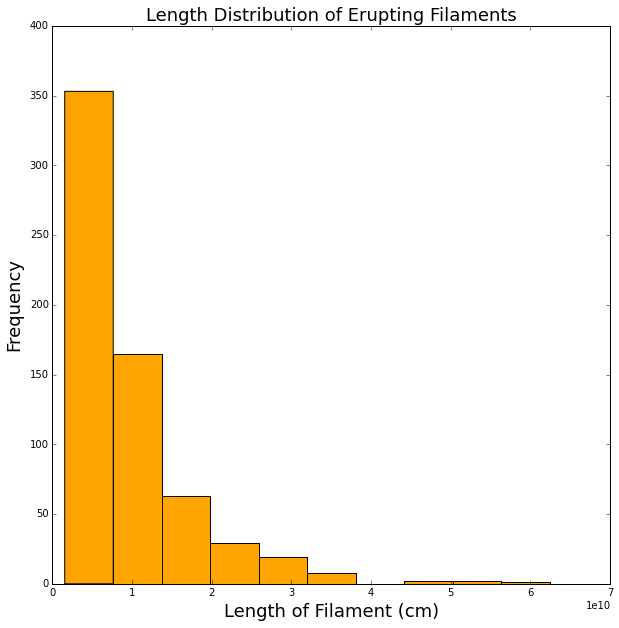

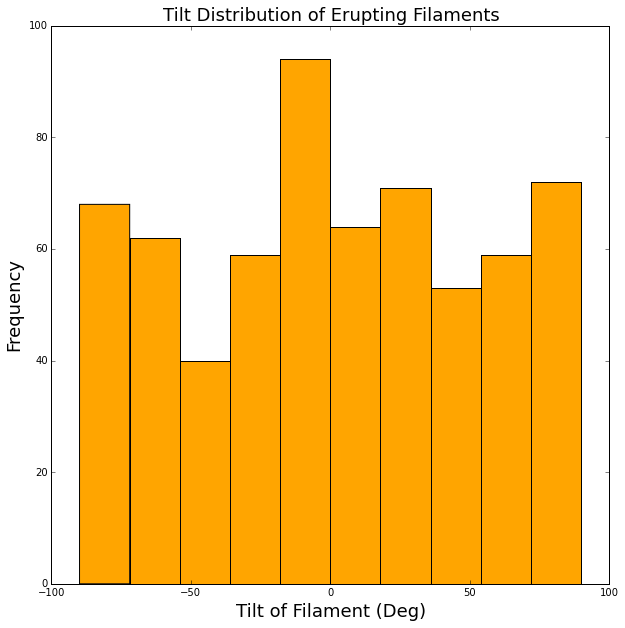

In [10]:
#Just getting to know the data a little bit. 
plt.figure(figsize=(10,10))
plt.grid(True)
plt.ylabel('Number of Erupting Filaments',fontsize=18)
plt.xlabel('Length of Filament (cm)',fontsize=18)
all_tracks_erupting['fi_length'].plot(kind='hist', rwidth=1.5, color = 'orange')
plt.title('Length Distribution of Erupting Filaments',fontsize=18)


    
plt.figure(figsize=(10,10))
plt.grid(True)
plt.ylabel('Number of Erupting Filaments',fontsize=18)
plt.xlabel('Tilt of Filament (Deg)',fontsize=18)
all_tracks_erupting['fi_tilt'].plot(kind='hist', rwidth=1.5, color = 'orange')
plt.title('Tilt Distribution of Erupting Filaments',fontsize=18)

In [11]:
#Add a column that expresses the time elapsed between filament measurements
grouped_filaments = all_tracks_erupting.groupby('Track No.')
stuff = 0
time_delta = []

for name, group in grouped_filaments:
    #print name
    
    t = group['HEK_time']
    
    time = [pd.to_datetime(date) for date in t]
    t0 = time[0]
    for i in range(len(time)):
        t1 = time[i]
        time_delta.append(timedelta.total_seconds(t1 - t0))
        
#print time_delta       
print len(all_tracks_erupting)
print len(time_delta)
all_tracks_erupting['time_delta'] = time_delta
all_tracks_erupting.head()

642
642


/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,time_delta
1,2,12771947500,2012-01-01 08:15:04,0,-6.07875,1339.339685,1,-335.032013,423.569000,2.906247,0
2,2,3372370430,2012-01-02 08:04:55,0,-16.45300,424.681161,0,-219.332993,427.597992,1.600002,85791
3,2,17364156400,2012-01-03 18:27:22,-1,-14.10050,2483.708249,6,155.949005,425.589996,2.479162,209538
4,2,4018147330,2012-01-04 08:49:18,0,-1.30679,524.859599,1,243.481995,430.621002,2.083332,261254
5,2,8323324900,2012-01-04 18:11:55,0,-3.15932,907.963637,1,315.923004,428.609009,3.243890,295011


In [12]:
#This will be my base program for plotting the trends for different features

def plot_slopes(x,y,m,b,title,ytitle):
    line = [m*each+b for each in x] #Calculate the line points (y =mx+b)
    
    plt.plot(x, y, color='orange', linestyle='-')
    plt.plot(x, line, '-.', color='blue')   ##plots the line fit
    plt.title(title)
    plt.grid(True)
    fig1 = plt.gcf()
    fig1.set_size_inches(10.5,10.5)
    plt.xlabel('Filament Track time')
    plt.ylabel(ytitle)
    plt.xticks( rotation= 80 )
    #plt.show() #<- uncomment this if you want to plot each filament on a different plot. This takes a lot longer.

# First lets calculate the average LENGTH and the change in length for the filament. 

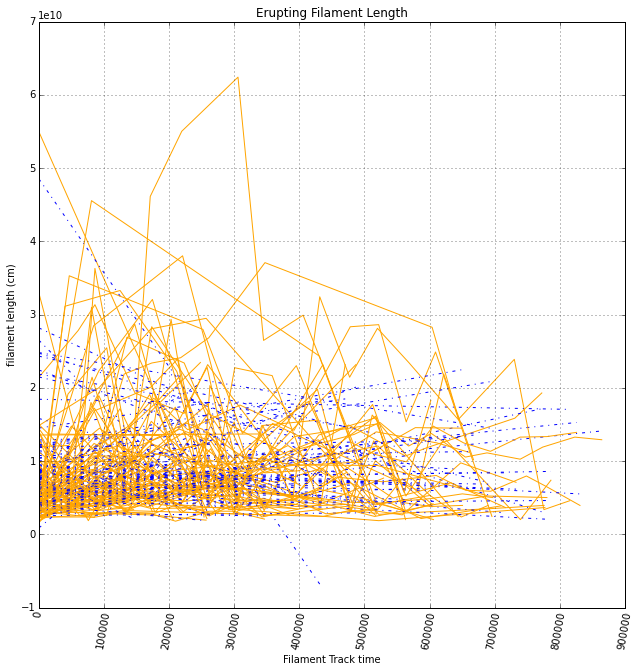

In [13]:
grouped_filaments = all_tracks_erupting.groupby('Track No.')
len_slopes = []
avg_len = []
len_stdev = []
len_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_len = group['fi_length']
    fit = np.polyfit(t_delt, f_len,1)
    len_slopes = len_slopes + [fit]*len(f_len) 
    avg_len.extend([f_len.mean()]*len(f_len))
    len_stdev.extend([np.std(f_len)]*len(f_len))
    len_skew.extend([stats.skew(f_len)]*len(f_len))
    plot_slopes(t_delt,f_len,fit[0],fit[1],'Erupting Filament Length','filament length (cm)')



In [14]:
len_slopes_only = [item[0] for item in len_slopes]

all_tracks_erupting['len_fits'] = len_slopes
all_tracks_erupting['len_slope'] = len_slopes_only
all_tracks_erupting['avg_len'] = avg_len
all_tracks_erupting['len_stdev'] = len_stdev
all_tracks_erupting['len_skew'] = len_skew
#all_tracks_erupting.head()

/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

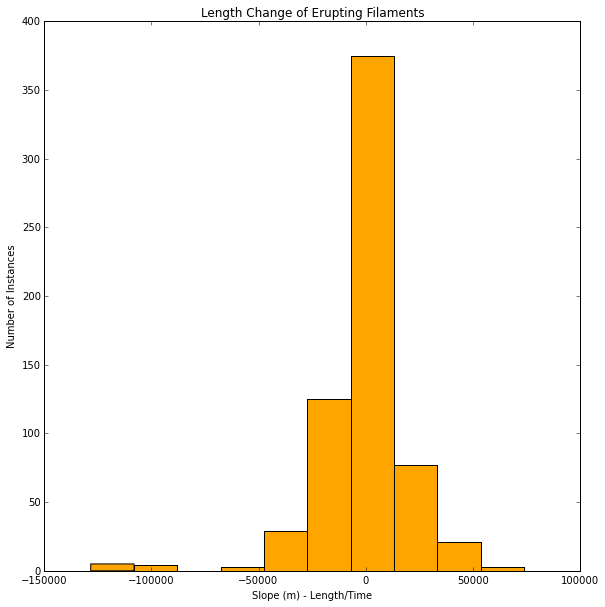

In [15]:
n_groups=5

plt.xlabel('Slope (m) - Length/Time')
plt.ylabel('Number of Instances')
plt.title('Length Change of Erupting Filaments')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.hist(len_slopes_only, color='orange')
plt.tight_layout()
plt.show()

#On to the AREA

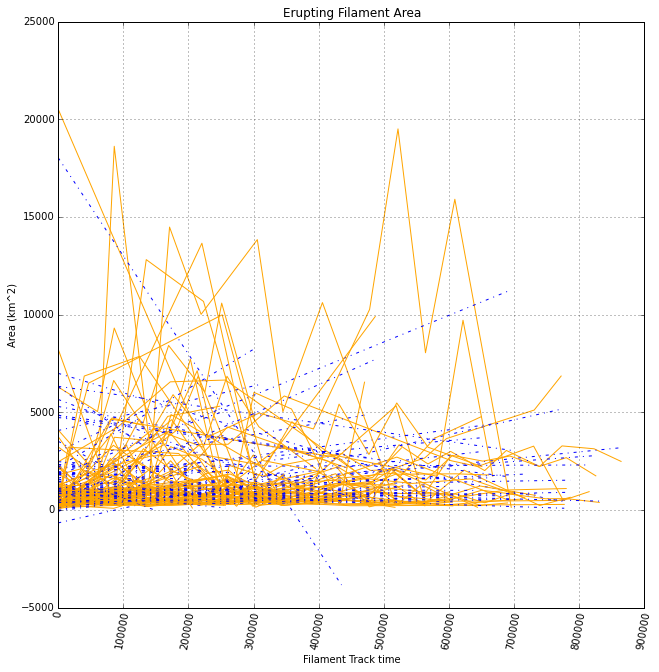

In [16]:
#The format of how I find the slope for each feature is the same
grouped_filaments = all_tracks_erupting.groupby('Track No.')
area_slopes = []
avg_area = []
area_stdev = []
area_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_area = group['area']
    fit = np.polyfit(t_delt, f_area,1)
    area_slopes = area_slopes + [fit]*len(f_area) 
    avg_area.extend([f_area.mean()]*len(f_area))
    area_stdev.extend([np.std(f_area)]*len(f_area))
    area_skew.extend([stats.skew(f_area)]*len(f_area))
    plot_slopes(t_delt,f_area,fit[0],fit[1],'Erupting Filament Area', 'Area (km^2)')

In [17]:
#Add the area information to the dataframe
area_slopes_only = [item[0] for item in area_slopes]
all_tracks_erupting['avg_area'] = avg_area
all_tracks_erupting['area_fits'] = area_slopes
all_tracks_erupting['area_slope'] = area_slopes_only
all_tracks_erupting['area_stdev'] = area_stdev
all_tracks_erupting['area_skew'] = area_skew
#all_tracks_erupting.head()

/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

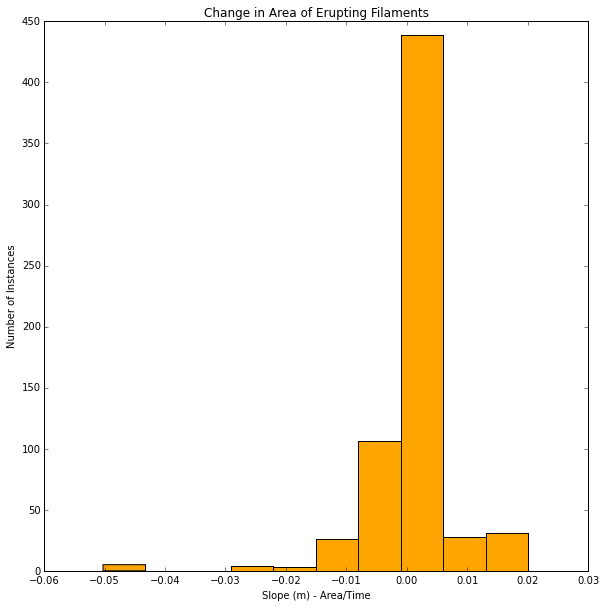

In [18]:
plt.xlabel('Slope (m) - Area/Time')
plt.ylabel('Number of Instances')
plt.title('Change in Area of Erupting Filaments')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.hist(area_slopes_only, color='orange')
plt.tight_layout()
plt.show()

#And the Length to Width Ratio

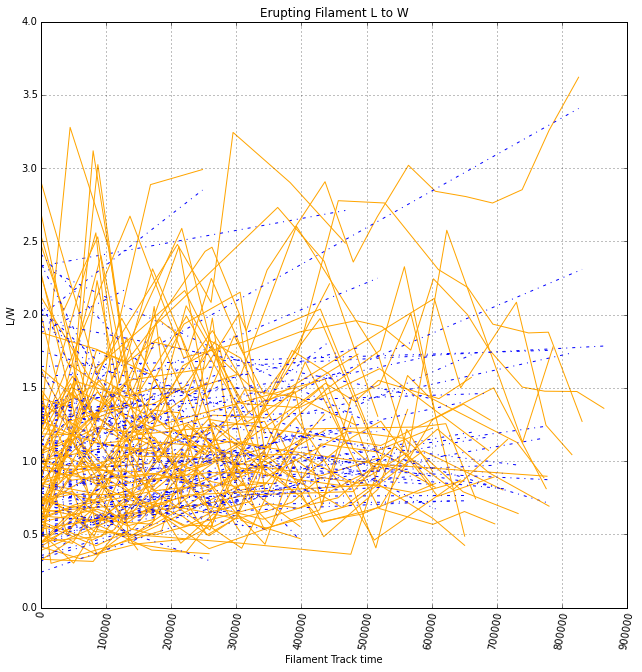

In [19]:
#The format of how I find the slope for each feature is the same
grouped_filaments = all_tracks_erupting.groupby('Track No.')
size_ratio_slopes = []
avg_size_ratio = []
size_ratio_stdev = []
size_ratio_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_size_ratio = group['L_to_W']
    fit = np.polyfit(t_delt, f_size_ratio,1)
    size_ratio_slopes = size_ratio_slopes + [fit]*len(f_size_ratio) 
    avg_size_ratio.extend([f_size_ratio.mean()]*len(f_size_ratio))
    size_ratio_stdev.extend([np.std(f_size_ratio)]*len(f_size_ratio))
    size_ratio_skew.extend([stats.skew(f_size_ratio)]*len(f_size_ratio))
    plot_slopes(t_delt,f_size_ratio,fit[0],fit[1],'Erupting Filament L to W', 'L/W')

In [20]:
#Add the area information to the dataframe
size_ratio_slopes_only = [item[0] for item in size_ratio_slopes]
all_tracks_erupting['avg_L_to_W'] = avg_size_ratio
all_tracks_erupting['L_to_W_slope'] = size_ratio_slopes_only
all_tracks_erupting['L_to_W_stdev'] = size_ratio_stdev
all_tracks_erupting['L_to_W_skew'] = size_ratio_skew
all_tracks_erupting.head()

/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,len_skew,avg_area,area_fits,area_slope,area_stdev,area_skew,avg_L_to_W,L_to_W_slope,L_to_W_stdev,L_to_W_skew
1,2,12771947500,2012-01-01 08:15:04,0,-6.07875,1339.339685,1,-335.032013,423.569000,2.906247,...,0.331922,1096.087085,"[-0.000500826738246, 1217.83777927]",-0.000501,649.915228,1.117098,2.528948,8.112376e-07,0.515202,-0.438115
2,2,3372370430,2012-01-02 08:04:55,0,-16.45300,424.681161,0,-219.332993,427.597992,1.600002,...,0.331922,1096.087085,"[-0.000500826738246, 1217.83777927]",-0.000501,649.915228,1.117098,2.528948,8.112376e-07,0.515202,-0.438115
3,2,17364156400,2012-01-03 18:27:22,-1,-14.10050,2483.708249,6,155.949005,425.589996,2.479162,...,0.331922,1096.087085,"[-0.000500826738246, 1217.83777927]",-0.000501,649.915228,1.117098,2.528948,8.112376e-07,0.515202,-0.438115
4,2,4018147330,2012-01-04 08:49:18,0,-1.30679,524.859599,1,243.481995,430.621002,2.083332,...,0.331922,1096.087085,"[-0.000500826738246, 1217.83777927]",-0.000501,649.915228,1.117098,2.528948,8.112376e-07,0.515202,-0.438115
5,2,8323324900,2012-01-04 18:11:55,0,-3.15932,907.963637,1,315.923004,428.609009,3.243890,...,0.331922,1096.087085,"[-0.000500826738246, 1217.83777927]",-0.000501,649.915228,1.117098,2.528948,8.112376e-07,0.515202,-0.438115


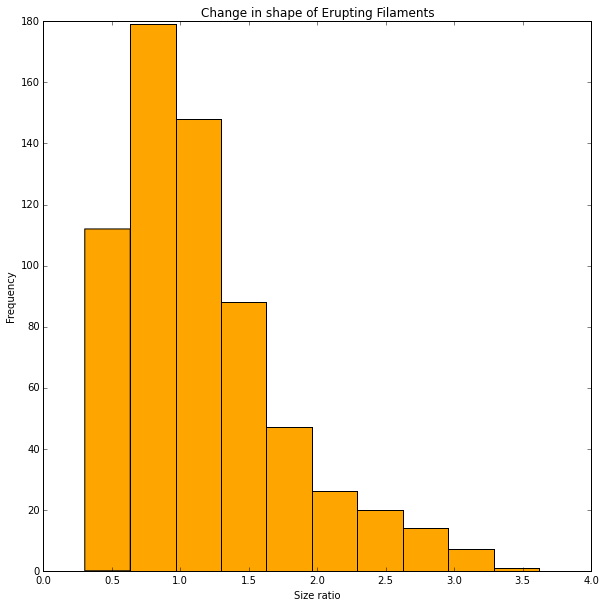

In [21]:
plt.xlabel('Size ratio')
plt.ylabel('Number of Instances')
plt.title('Change in shape of Erupting Filaments')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
all_tracks_erupting['L_to_W'].plot.hist(color='orange')
#plt.hist(all_tracks_erupting['L_to_W'], color='orange')
#print all_tracks_erupting['L_to_W']
plt.tight_layout()
plt.show()

#Let's check out those barbs

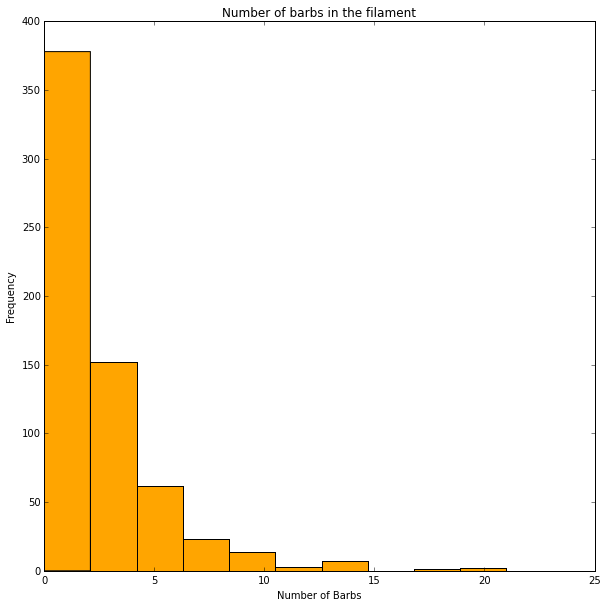

In [22]:
#barbs = all_tracks_trans['fi_barbstot']
plt.xlabel('Number of Barbs')
plt.ylabel('Number of Instances')
plt.title('Number of barbs in the filament')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
#plt.hist(barbs)
plt.tight_layout()
all_tracks_erupting['fi_barbstot'].plot(kind='hist', rwidth=1.5, color = 'orange')

In [23]:
grouped_filaments = all_tracks_erupting.groupby('Track No.')
avg_barbs = []
barb_slope = []
barb_stdev = []
barb_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    barbstot = group['fi_barbstot']
    fit = np.polyfit(t_delt, barbstot,1)
    barb_slope = barb_slope + [fit]*len(barbstot) 
    avg_barbs.extend([barbstot.mean()]*len(barbstot))
    barb_stdev.extend([np.std(barbstot)]*len(barbstot))
    barb_skew.extend([stats.skew(barbstot)]*len(barbstot))
    #plot_slopes(t_delt,barbstot,fit[0],fit[1])
    
barb_slopes_only = [item[0] for item in barb_slope]

In [24]:
print len(avg_barbs)
print len(barb_slope)
all_tracks_erupting['avg_barbs'] = avg_barbs
all_tracks_erupting['barb_slope'] = barb_slopes_only
all_tracks_erupting['barb_stdev'] = barb_stdev
all_tracks_erupting['barb_skew'] = barb_skew
#all_tracks_erupting.head()

642
642


#How tilted is it?

In [25]:
print min(all_tracks_erupting['fi_tilt'])
print max(all_tracks_erupting['fi_tilt'])

-89.9344
89.842


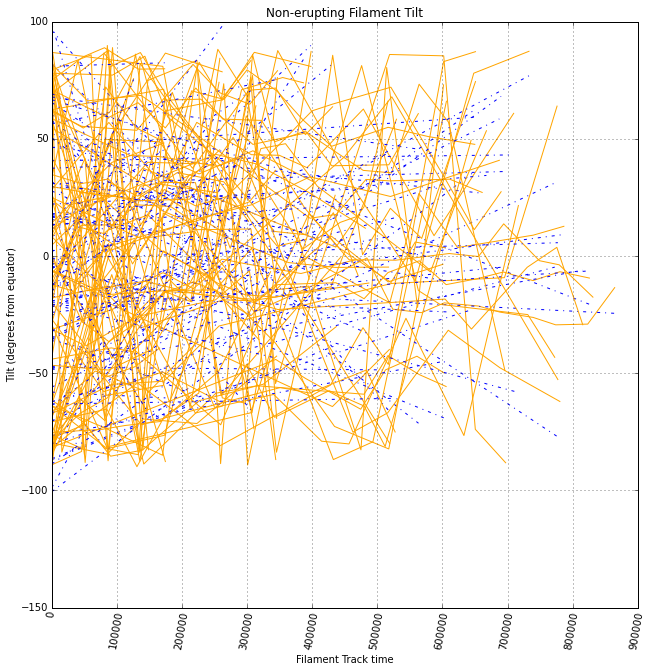

In [26]:
grouped_filaments = all_tracks_erupting.groupby('Track No.')
tilt_slope = []
avg_tilt = []
tilt_stdev = []
tilt_skew = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_tilt = group['fi_tilt']
    fit = np.polyfit(t_delt, f_tilt,1)
    tilt_slope = tilt_slope + [fit]*len(f_tilt)  
    avg_tilt.extend([f_tilt.mean()]*len(f_tilt))
    tilt_stdev.extend([np.std(f_tilt)]*len(f_tilt))
    tilt_skew.extend([stats.skew(f_tilt)]*len(f_tilt))
    plot_slopes(t_delt,f_tilt,fit[0],fit[1],'Non-erupting Filament Tilt','Tilt (degrees from equator)')
       
tilt_slopes_only = [item[0] for item in tilt_slope]

In [27]:
all_tracks_erupting['avg_tilt'] = avg_tilt
all_tracks_erupting['tilt_slope'] = tilt_slopes_only
all_tracks_erupting['tilt_stdev'] = tilt_stdev
all_tracks_erupting['tilt_skew'] = tilt_skew
#all_tracks_erupting.head()

359
283


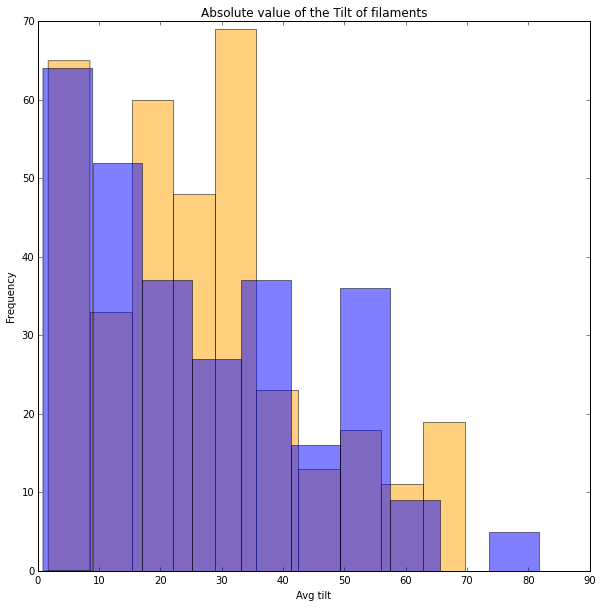

In [28]:
north_filaments = all_tracks_erupting[all_tracks_erupting['ycen']>=0]
south_filaments = all_tracks_erupting[all_tracks_erupting['ycen']<0]
print len(north_filaments)
print len(south_filaments)
#barbs = all_tracks_erupting['fi_barbstot']
plt.xlabel('Avg tilt')
plt.ylabel('Number of Instances')
plt.xlim([0,90])
plt.title('Absolute value of the Tilt of filaments')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
#plt.hist(barbs)
plt.tight_layout()
abs(north_filaments['avg_tilt']).plot(kind='hist', rwidth=1.5, color = 'orange', alpha=0.5)
abs(south_filaments['avg_tilt']).plot(kind='hist', rwidth=1.5, color = 'blue', alpha=0.5)

#Next stop: Chirality

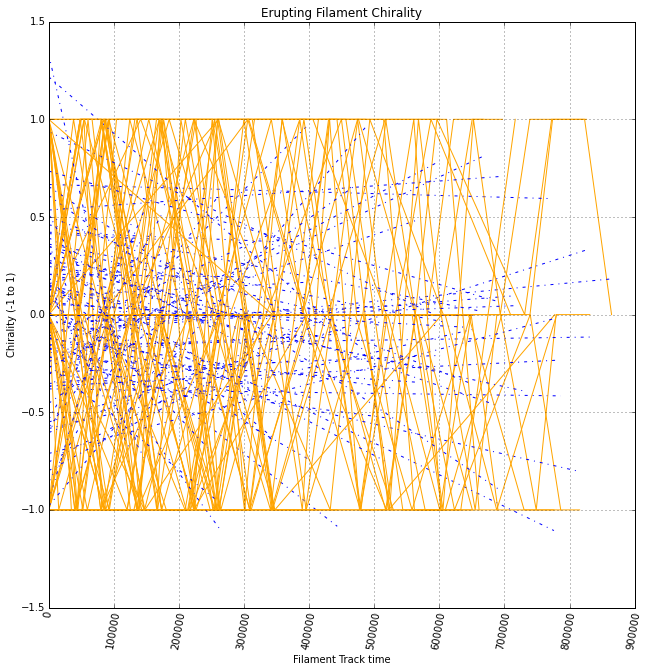

In [29]:
grouped_filaments = all_tracks_erupting.groupby('Track No.')
chiral_slope = []
avg_chiral = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_chiral = group['fi_chirality']
    fit = np.polyfit(t_delt, f_chiral,1)
    chiral_slope = chiral_slope + [fit]*len(f_chiral)  
    avg_chiral.extend([f_chiral.mean()]*len(f_chiral))
    plot_slopes(t_delt,f_chiral,fit[0],fit[1],'Erupting Filament Chirality','Chirality (-1 to 1)')
       
chiral_slopes_only = [item[0] for item in chiral_slope]

In [30]:
all_tracks_erupting['avg_chirality'] = avg_chiral
all_tracks_erupting['chirality_slope'] = chiral_slopes_only
#all_tracks_erupting.head()

#Add the average X and Y coordiantes to the mix for good measure

In [31]:
grouped_filaments = all_tracks_erupting.groupby('Track No.')
avg_x = []
avg_y = []
for name, group in grouped_filaments:
    f_xloc = group['xcen']
    f_yloc = group['ycen'] 
    avg_x.extend([f_xloc.mean()]*len(f_xloc))
    avg_y.extend([f_yloc.mean()]*len(f_yloc))
all_tracks_erupting['avg_xcen'] = avg_x
all_tracks_erupting['avg_ycen'] = avg_y
all_tracks_erupting.head()

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,barb_stdev,barb_skew,avg_tilt,tilt_slope,tilt_stdev,tilt_skew,avg_chirality,chirality_slope,avg_xcen,avg_ycen
1,2,12771947500,2012-01-01 08:15:04,0,-6.07875,1339.339685,1,-335.032013,423.569000,2.906247,...,1.884415,0.946315,-7.153671,0.000019,5.578701,-0.572575,-0.142857,2.126825e-07,185.844144,426.017713
2,2,3372370430,2012-01-02 08:04:55,0,-16.45300,424.681161,0,-219.332993,427.597992,1.600002,...,1.884415,0.946315,-7.153671,0.000019,5.578701,-0.572575,-0.142857,2.126825e-07,185.844144,426.017713
3,2,17364156400,2012-01-03 18:27:22,-1,-14.10050,2483.708249,6,155.949005,425.589996,2.479162,...,1.884415,0.946315,-7.153671,0.000019,5.578701,-0.572575,-0.142857,2.126825e-07,185.844144,426.017713
4,2,4018147330,2012-01-04 08:49:18,0,-1.30679,524.859599,1,243.481995,430.621002,2.083332,...,1.884415,0.946315,-7.153671,0.000019,5.578701,-0.572575,-0.142857,2.126825e-07,185.844144,426.017713
5,2,8323324900,2012-01-04 18:11:55,0,-3.15932,907.963637,1,315.923004,428.609009,3.243890,...,1.884415,0.946315,-7.153671,0.000019,5.578701,-0.572575,-0.142857,2.126825e-07,185.844144,426.017713


In [32]:
all_tracks_erupting.keys()

Index([u'Track No.', u'fi_length', u'HEK_time', u'fi_chirality', u'fi_tilt',
       u'area', u'fi_barbstot', u'xcen', u'ycen', u'L_to_W', u'time_delta',
       u'len_fits', u'len_slope', u'avg_len', u'len_stdev', u'len_skew',
       u'avg_area', u'area_fits', u'area_slope', u'area_stdev', u'area_skew',
       u'avg_L_to_W', u'L_to_W_slope', u'L_to_W_stdev', u'L_to_W_skew',
       u'avg_barbs', u'barb_slope', u'barb_stdev', u'barb_skew', u'avg_tilt',
       u'tilt_slope', u'tilt_stdev', u'tilt_skew', u'avg_chirality',
       u'chirality_slope', u'avg_xcen', u'avg_ycen'],
      dtype='object')

In [33]:
short_list = grouped_filaments.first()

In [34]:
short_list.reset_index(inplace=1) #Inplace keeps Track No. as a column, rather than setting it as an index
short_list.head()

,Track No.,fi_length,HEK_time,fi_chirality,fi_tilt,area,fi_barbstot,xcen,ycen,L_to_W,...,barb_stdev,barb_skew,avg_tilt,tilt_slope,tilt_stdev,tilt_skew,avg_chirality,chirality_slope,avg_xcen,avg_ycen
0,2,12771947500,2012-01-01 08:15:04,0,-6.07875,1339.339685,1,-335.032013,423.569000,2.906247,...,1.884415,0.946315,-7.153671,0.000019,5.578701,-0.572575,-0.142857,2.126825e-07,185.844144,426.017713
1,21,4233399040,2012-01-03 18:27:22,0,-29.36610,568.446756,1,-684.164001,423.578003,1.346155,...,1.299038,-0.213833,-30.974575,0.000327,58.593676,0.784443,0.000000,0.000000e+00,-439.171745,329.000000
2,58,3731130620,2012-01-05 18:32:45,0,-79.75140,467.702655,1,-271.651001,771.689026,0.571429,...,1.600000,1.500000,-69.598000,0.000109,14.510152,0.986719,0.400000,-1.383434e-07,-14.090422,680.316602
3,93,2296083200,2012-01-09 18:28:35,0,57.85710,234.227710,1,-646.885010,680.083984,0.914894,...,5.996598,1.886265,-5.521160,-0.000114,52.196091,0.383411,-0.142857,-2.750033e-06,-172.326899,656.900129
4,94,21453991900,2012-01-09 18:28:35,-1,79.40680,6292.912683,5,-402.416992,313.885010,0.414634,...,2.934174,1.302166,28.372649,-0.000116,72.680738,-0.749395,0.250000,3.380289e-06,80.834544,303.171875


In [35]:
short_list.to_csv('Eruption_Analysis_Updated.csv', columns = ('Track No.', 'avg_len', 'len_slope', 'len_stdev','len_skew','avg_area', 'area_slope', 'avg_chirality','area_stdev','area_skew', 'chirality_slope', 'avg_barbs', 'barb_slope','barb_stdev','barb_skew','avg_tilt', 'tilt_slope','tilt_stdev','tilt_skew','avg_xcen','avg_ycen','avg_L_to_W','L_to_W_slope','L_to_W_stdev','L_to_W_skew'))

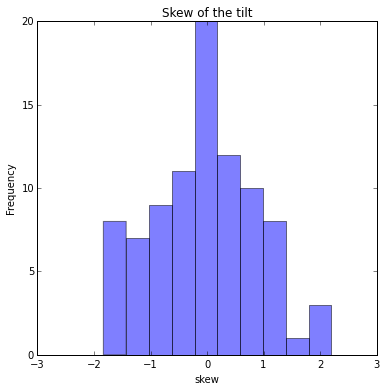

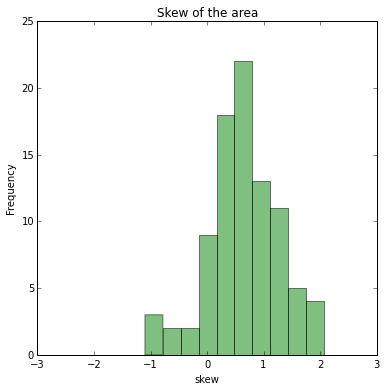

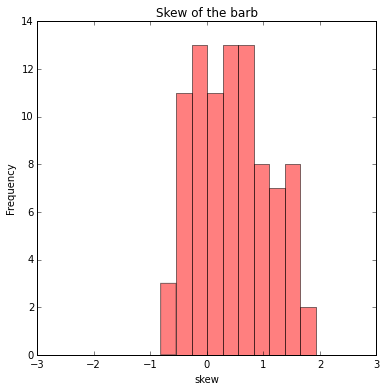

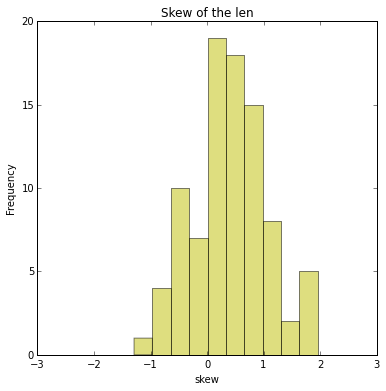

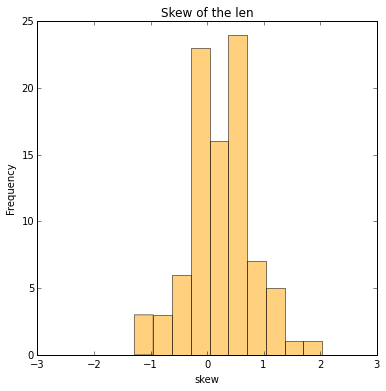

In [36]:
def plot_skew(param_list, color, param):
    plt.xlabel('skew')
    plt.ylabel('Number of Instances')
    plt.xlim([-3,3])
    plt.title('Skew of the %s' % param)
    fig1 = plt.gcf()
    fig1.set_size_inches(5.5,5.5)
    plt.tight_layout()
    param_list.plot(kind='hist',rwidth=1.5, color = color, alpha=0.5)
    plt.show()


plot_skew(short_list['tilt_skew'],color='b', param='tilt')
plot_skew(short_list['area_skew'],color='g', param='area')
plot_skew(short_list['barb_skew'],color='r', param='barb')
plot_skew(short_list['len_skew'],color='y', param='len')
plot_skew(short_list['L_to_W_skew'],color='orange', param='len')

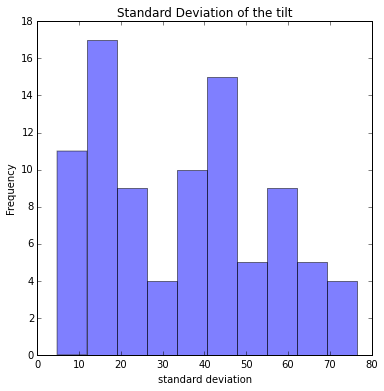

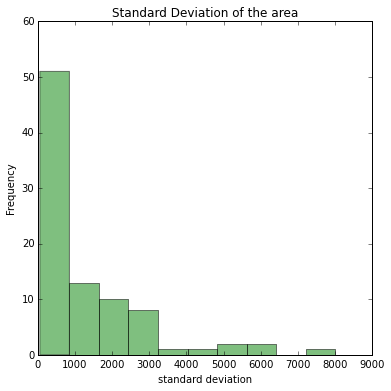

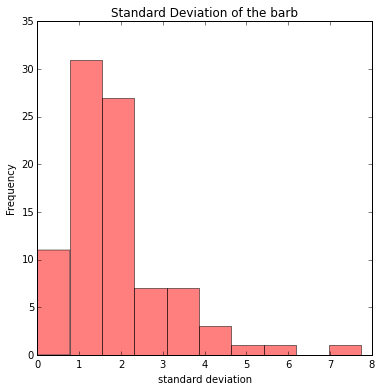

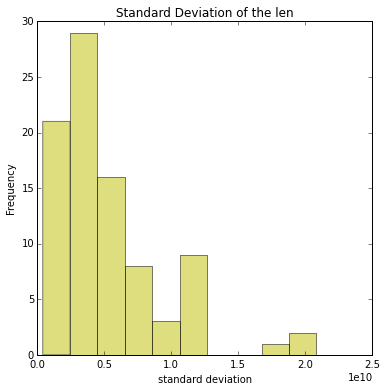

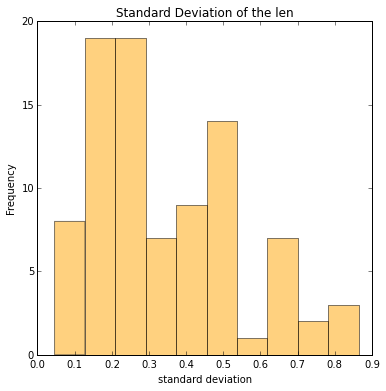

In [37]:
def plot_stdev(param_list, color, param):
    plt.xlabel('standard deviation')
    plt.ylabel('Number of Instances')
    #plt.xlim([-3,3])
    plt.title('Standard Deviation of the %s' % param)
    fig1 = plt.gcf()
    fig1.set_size_inches(5.5,5.5)
    plt.tight_layout()
    param_list.plot(kind='hist',rwidth=1.5, color = color, alpha=0.5)
    plt.show()


plot_stdev(short_list['tilt_stdev'],color='b', param='tilt')
plot_stdev(short_list['area_stdev'],color='g', param='area')
plot_stdev(short_list['barb_stdev'],color='r', param='barb')
plot_stdev(short_list['len_stdev'],color='y', param='len')
plot_stdev(short_list['L_to_W_stdev'],color='orange', param='len')